# Reading rasterfiles with Rasterio
Here we look at reading and examining the contents of satellite raster data.
Landsat bands are stored as separate GeoTIFF files in the original package. Each band contains information of surface reflectance from different ranges of the electromagnetic spectrum.

In [1]:
# Necessary imports
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist

In [2]:
# Open a raster file to a read object
raster = rasterio.open("Data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif")
type(raster)

rasterio._io.RasterReader

In [3]:
# Projection
print("Projection:\n", raster.crs)

# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
print("Transform matrix:\n", raster.transform)

# Dimensions
print("Width x Height:", raster.width, raster.height)
    
# Number of bands
print("# Bands:", raster.count)

# Bounds of the file
print("Bounds:\n", raster.bounds)

# Driver (data format)
print("Format:", raster.driver)

# No data values for all channels
print("Null values/channel:\n", raster.nodatavals)

# All Metadata for the whole raster dataset
#raster.meta

Projection:
 CRS({'proj': 'tmerc', 'k': 0.9996, 'lon_0': -183, 'datum': 'WGS84', 'x_0': 500000, 'units': 'm', 'lat_0': 0, 'y_0': 0, 'no_defs': True})
Transform matrix:
 [698592.0, 28.5, 0.0, 6697870.5, 0.0, -28.5]
Width x Height: 1288 1439
# Bands: 7
Bounds:
 BoundingBox(left=698592.0, bottom=6656859.0, right=735300.0, top=6697870.5)
Format: GTiff
Null values/channel:
 (None, None, None, None, None, None, None)


/opt/share/anaconda3_GIS/envs/gis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Read the 1st raster band as separate variable (1-indexed)
band1 = raster.read(1)
print(type(band1), band1.shape, band1.dtype)

<class 'numpy.ndarray'> (1439, 1288) uint8


In [5]:
# Read all bands
array = raster.read()
print(type(array), array.shape)

<class 'numpy.ndarray'> (7, 1439, 1288)


## Visualising Raster Bands

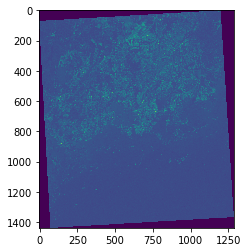

In [6]:
%matplotlib inline
show(raster)

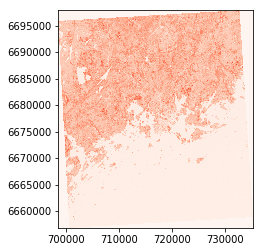

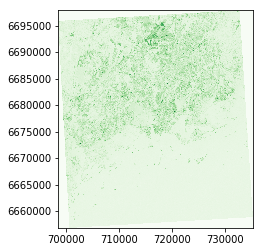

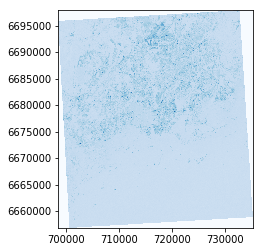

In [7]:
show((raster, 4), cmap='Reds')

show((raster, 3), cmap='Greens')

show((raster, 1), cmap='Blues')

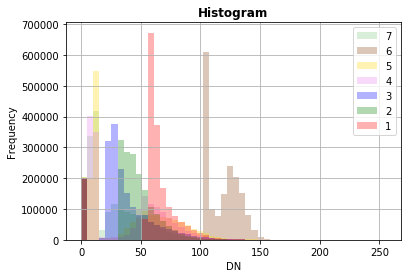

In [8]:
# Plotting histogram of bands
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")